# Pre-analysis of MoS2 15kV Ptychography data

In [1]:
%matplotlib inline
import numpy as np
import h5py
import sys
sys.path.append('/dls_sw/i13-1/scripts/ptyrex/ptyrex_3/')
import ptyrex
import hyperspy.api as hs
import os

ImportError: No module named 'cv2'


2020-06-17 10:21:09,362:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/hyperspy/io_plugins/bruker.py:69:The fast cython based bcf unpacking library were found
2020-06-17 10:21:09,469:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/mrcz/ioMRC.py:51:`python-rapidjson` not found, using builtin `json` instead.
2020-06-17 10:21:14,247:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/hyperspy_gui_traitsui/__init__.py:30:Initial ETS toolkit set to 
2020-06-17 10:21:14,249:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/hyperspy_gui_traitsui/__init__.py:55:Loading hyperspy.traitsui_gui
2020-06-17 10:21:14,250:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/hyperspy_gui_traitsui/__init__.py:56:Current MPL backend: module://ipykernel.pylab.backend_inline
2020-06-17 10:21:14,251:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3

### Lazy Hyperspy load of full 4D dataset

In [2]:
fp = fp = '/dls/e02/data/2019/cm22979-6/processing/Merlin/Merlin/20191001_15kV_ptycho/MoS2_700C/20191002 145557/MoS2_15kV_100umClAp_3Mx_focus_A2_1p07.hdf5'

#fp = '/dls/e02/data/2019/cm22979-6/processing/Merlin/Merlin/20191001_15kV_ptycho/MoS2_700C/20191002 152207/MoS2_15kV_100umClAp_3Mx_154def_A2_1p07_db.hdf5'
d = hs.load(fp, lazy = True)

#reset navigation offset
d.axes_manager.navigation_axes[0].offset = 0
d.axes_manager.navigation_axes[1].offset = 0

### Take every nth probe position so can quickly visualise data

In [3]:
d_sub = d.inav[::1, ::1]
d_sub.compute()

[########################################] | 100% Completed |  2min 43.4s


In [4]:
%matplotlib qt 
#pop out plot - you may need to run this a couple of times

2020-06-17 10:25:03,676:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/pyplot.py:225:Loaded backend Qt5Agg version unknown.


In [5]:
px_in_crop = 32
d_sub.plot()
sq_roi = hs.roi.RectangularROI(0,0,px_in_crop,px_in_crop)
roi_dat = sq_roi.interactive(d_sub)

2020-06-17 10:25:30,931:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:560:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f858c634860>
2020-06-17 10:25:30,934:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:608:Using auto colorbar locator on colorbar
2020-06-17 10:25:30,935:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:609:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f858c634860>
2020-06-17 10:25:30,936:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:780:Setting pcolormesh
2020-06-17 10:25:30,944:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1259:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2020-06-17 

2020-06-17 10:25:30,977:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-17 10:25:30,978:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:30,979:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:30,980:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-17 10:25:30,982:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7

2020-06-17 10:25:31,015:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:31,016:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifBoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:31,017:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:31,018:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Abyssinica SIL' (AbyssinicaSIL-R.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,019:/dls_sw/apps/python/anaconda/4.6.

2020-06-17 10:25:31,050:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal bold normal>) = 3.9713636363636367
2020-06-17 10:25:31,050:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:31,051:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS76F.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:31,052:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans Narrow' (PTN57F.ttf) normal normal 400 condensed>) = 10.25
2020-06-17 10:25:31,053:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pyt

2020-06-17 10:25:31,083:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (courbd.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:31,083:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-LightItalic.otf) italic normal light normal>) = 11.24
2020-06-17 10:25:31,084:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-Bold.otf) normal normal bold normal>) = 10.335
2020-06-17 10:25:31,085:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifBold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:31,086:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pytho

2020-06-17 10:25:31,122:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Times New Roman' (times.ttf) normal normal roman normal>) = 10.145
2020-06-17 10:25:31,123:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSansOblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-17 10:25:31,124:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'VL Gothic' (VL-Gothic-Regular.ttf) normal normal regular normal>) = 10.05
2020-06-17 10:25:31,124:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-Regular.otf) normal normal regular normal>) = 10.05
2020-06-17 10:25:31,125:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pytho

2020-06-17 10:25:31,145:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:31,146:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:31,146:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Jomolhari' (Jomolhari-alpha3c-0605331.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,147:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerif.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,147:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python

2020-06-17 10:25:31,180:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,181:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 1.05
2020-06-17 10:25:31,182:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:31,182:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:31,183:/dls_sw/apps/python/anaconda/4.6.14/64/envs/p

2020-06-17 10:25:31,200:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'AR PL UMing CN' (uming.ttc) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,201:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-Roman.otf) normal normal roman normal>) = 10.145
2020-06-17 10:25:31,201:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,204:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSansBoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-17 10:25:31,206:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7

2020-06-17 10:25:31,223:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-Demi.otf) normal normal demi normal>) = 10.24
2020-06-17 10:25:31,223:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Marathi' (Lohit-Marathi.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,224:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:31,224:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:31,225:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pytho

2020-06-17 10:25:31,242:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:31,242:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS75F.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:31,243:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Regular-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:31,243:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:31,244:/dls_sw/apps/python/anaconda/4.6.14/64

2020-06-17 10:25:31,262:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:31,262:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,263:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-Bold.otf) normal normal roman normal>) = 10.145
2020-06-17 10:25:31,263:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,264:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pytho

2020-06-17 10:25:31,280:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,281:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMono.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,281:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Semibold.ttf) normal normal semibold normal>) = 10.24
2020-06-17 10:25:31,282:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Khmer OS Content' (KhmerOS_content.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,282:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/li

2020-06-17 10:25:31,299:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'WenQuanYi Zen Hei' (wqy-zenhei.ttc) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,299:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,300:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,300:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-Bold.otf) normal normal bold normal>) = 10.335
2020-06-17 10:25:31,301:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python

2020-06-17 10:25:31,325:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal bold normal>) = 1.335
2020-06-17 10:25:31,326:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 11.335
2020-06-17 10:25:31,326:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal bold normal>) = 10.434999999999999
2020-06-17 10:25:31,327:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 11.05
2020-06-17 10:25:31,327:/dls_sw/apps/python/anaconda/4.6.14

2020-06-17 10:25:31,344:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-ExtraBoldItalic.ttf) italic normal bold normal>) = 10.335
2020-06-17 10:25:31,344:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Italic.ttf) italic normal 400 normal>) = 10.05
2020-06-17 10:25:31,345:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Stam Ashkenaz CLM' (StamAshkenazCLM.ttf) normal normal 400 normal>) = 11.05
2020-06-17 10:25:31,345:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Oblique.otf) oblique normal 400 condensed>) = 10.35
2020-06-17 10:25:31,346:/dls_

2020-06-17 10:25:31,363:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans' (LiberationSans-Italic.ttf) italic normal 400 normal>) = 10.05
2020-06-17 10:25:31,363:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Italic.ttf) italic normal 400 normal>) = 10.05
2020-06-17 10:25:31,364:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-Italic.otf) italic normal roman normal>) = 10.145
2020-06-17 10:25:31,364:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'LKLUG' (lklug.ttf) normal normal 400 normal>) = 11.05
2020-06-17 10:25:31,365:/dls_sw/apps/python/anaconda/4.6.14/64/en

2020-06-17 10:25:31,381:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifItalic.ttf) italic normal 400 normal>) = 10.05
2020-06-17 10:25:31,382:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 11.05
2020-06-17 10:25:31,382:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-BookOblique.ttf) oblique normal book normal>) = 10.15
2020-06-17 10:25:31,383:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Punjabi' (Lohit-Punjabi.ttf) normal normal 400 normal>) = 11.05
2020-06-17 10:25:31,383:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python

2020-06-17 10:25:31,400:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Bold.otf) normal normal bold condensed>) = 11.535
2020-06-17 10:25:31,401:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-BoldItalic.ttf) italic normal bold normal>) = 10.335
2020-06-17 10:25:31,401:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Gujarati' (Lohit-Gujarati.ttf) normal normal 400 normal>) = 11.05
2020-06-17 10:25:31,402:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-ExtraLight.ttf) normal normal light normal>) = 11.24
2020-06-17 10:25:31,402:/dls_sw/apps/python/anaconda

2020-06-17 10:25:31,419:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-Italic.otf) italic normal 400 normal>) = 10.05
2020-06-17 10:25:31,419:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'NanumGothic' (NanumGothicExtraBold.ttf) normal normal bold normal>) = 11.335
2020-06-17 10:25:31,420:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree-Oblique.ttf) oblique normal 400 normal>) = 10.15
2020-06-17 10:25:31,420:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-Bold.ttf) normal normal bold normal>) = 11.335
2020-06-17 10:25:31,421:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pytho

2020-06-17 10:25:31,439:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (arialbd.ttf) normal normal bold normal>) = 11.335
2020-06-17 10:25:31,439:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-BookOblique.otf) oblique normal book normal>) = 10.15
2020-06-17 10:25:31,440:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Italic.ttf) italic normal 400 condensed>) = 10.25
2020-06-17 10:25:31,440:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Z003' (Z003-MediumItalic.otf) italic normal medium normal>) = 10.145
2020-06-17 10:25:31,441:/dls_sw/apps/python/anaconda/4.6

2020-06-17 10:25:31,481:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:31,482:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:31,482:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 1.05
2020-06-17 10:25:31,483:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal bold normal>) = 1.335
2020-06-17 10:25:31,483:/dls_sw/apps/python/anaconda/4.6.14

2020-06-17 10:25:31,500:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-Roman.otf) normal normal roman normal>) = 10.145
2020-06-17 10:25:31,501:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,501:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSansBoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-17 10:25:31,502:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-Bold.ttf) normal normal bold condensed>) = 10.535
2020-06-17 10:25:31,502:/dls_sw/apps/python/anaconda/4.6

2020-06-17 10:25:31,519:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Marathi' (Lohit-Marathi.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,519:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:31,520:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:31,520:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Devanagari' (Lohit-Devanagari.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,521:/dls_sw/apps/python/anaconda/4.6.14/64/env

2020-06-17 10:25:31,537:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS75F.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:31,537:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Regular-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:31,538:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:31,538:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial Black' (ariblk.ttf) normal normal black normal>) = 10.525
2020-06-17 10:25:31,539:/dls_sw/apps/python/anaconda/4.6.14/64/envs/py

2020-06-17 10:25:31,560:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,561:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-Bold.otf) normal normal roman normal>) = 10.145
2020-06-17 10:25:31,562:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,563:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-BoldItalic.otf) italic normal bold normal>) = 11.335
2020-06-17 10:25:31,564:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.

2020-06-17 10:25:31,588:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMono.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,589:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Semibold.ttf) normal normal semibold normal>) = 10.24
2020-06-17 10:25:31,590:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Khmer OS Content' (KhmerOS_content.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,591:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-BoldOblique.ttf) oblique normal bold condensed>) = 11.535
2020-06-17 10:25:31,591:/dls_sw/apps/python/anaconda/4

2020-06-17 10:25:31,616:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,616:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,617:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-Bold.otf) normal normal bold normal>) = 10.335
2020-06-17 10:25:31,618:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-BoldOblique.otf) oblique normal bold normal>) = 11.335
2020-06-17 10:25:31,618:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/

2020-06-17 10:25:31,664:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal bold normal>) = 11.335
2020-06-17 10:25:31,665:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 11.335
2020-06-17 10:25:31,666:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal bold normal>) = 10.434999999999999
2020-06-17 10:25:31,666:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 11.05
2020-06-17 10:25:31,667:/dls_sw/apps/python/anaconda/4.6.1

2020-06-17 10:25:31,690:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-ExtraBoldItalic.ttf) italic normal bold normal>) = 10.335
2020-06-17 10:25:31,691:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Italic.ttf) italic normal 400 normal>) = 10.05
2020-06-17 10:25:31,691:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Stam Ashkenaz CLM' (StamAshkenazCLM.ttf) normal normal 400 normal>) = 11.05
2020-06-17 10:25:31,692:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Oblique.otf) oblique normal 400 condensed>) = 10.35
2020-06-17 10:25:31,692:/dls_

2020-06-17 10:25:31,711:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans' (LiberationSans-Italic.ttf) italic normal 400 normal>) = 10.05
2020-06-17 10:25:31,712:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Italic.ttf) italic normal 400 normal>) = 10.05
2020-06-17 10:25:31,712:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-Italic.otf) italic normal roman normal>) = 10.145
2020-06-17 10:25:31,713:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'LKLUG' (lklug.ttf) normal normal 400 normal>) = 11.05
2020-06-17 10:25:31,713:/dls_sw/apps/python/anaconda/4.6.14/64/en

2020-06-17 10:25:31,731:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifItalic.ttf) italic normal 400 normal>) = 10.05
2020-06-17 10:25:31,732:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 11.05
2020-06-17 10:25:31,732:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-BookOblique.ttf) oblique normal book normal>) = 10.15
2020-06-17 10:25:31,733:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Punjabi' (Lohit-Punjabi.ttf) normal normal 400 normal>) = 11.05
2020-06-17 10:25:31,733:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python

2020-06-17 10:25:31,750:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Bold.otf) normal normal bold condensed>) = 11.535
2020-06-17 10:25:31,750:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-BoldItalic.ttf) italic normal bold normal>) = 10.335
2020-06-17 10:25:31,751:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Gujarati' (Lohit-Gujarati.ttf) normal normal 400 normal>) = 11.05
2020-06-17 10:25:31,751:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-ExtraLight.ttf) normal normal light normal>) = 11.24
2020-06-17 10:25:31,752:/dls_sw/apps/python/anaconda

2020-06-17 10:25:31,768:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-Italic.otf) italic normal 400 normal>) = 10.05
2020-06-17 10:25:31,769:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'NanumGothic' (NanumGothicExtraBold.ttf) normal normal bold normal>) = 11.335
2020-06-17 10:25:31,770:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree-Oblique.ttf) oblique normal 400 normal>) = 10.15
2020-06-17 10:25:31,771:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-Bold.ttf) normal normal bold normal>) = 11.335
2020-06-17 10:25:31,771:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pytho

2020-06-17 10:25:31,787:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (arialbd.ttf) normal normal bold normal>) = 11.335
2020-06-17 10:25:31,788:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-BookOblique.otf) oblique normal book normal>) = 10.15
2020-06-17 10:25:31,788:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Italic.ttf) italic normal 400 condensed>) = 10.25
2020-06-17 10:25:31,789:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Z003' (Z003-MediumItalic.otf) italic normal medium normal>) = 10.145
2020-06-17 10:25:31,789:/dls_sw/apps/python/anaconda/4.6

2020-06-17 10:25:31,809:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.335
2020-06-17 10:25:31,810:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.335
2020-06-17 10:25:31,810:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal bold normal>) = 10.0
2020-06-17 10:25:31,811:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.335
2020-06-17 10:25:31,811:/dls_sw/apps/python/anaconda/4.6.14/64/en

2020-06-17 10:25:31,839:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,839:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,840:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,840:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,841:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python

2020-06-17 10:25:31,858:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Times New Roman' (timesi.ttf) italic normal roman normal>) = 11.145
2020-06-17 10:25:31,859:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'WenQuanYi Micro Hei' (wqy-microhei.ttc) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,859:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:31,860:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:31,860:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.

2020-06-17 10:25:31,876:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIX' (STIX-BoldItalic.otf) italic normal bold normal>) = 11.335
2020-06-17 10:25:31,876:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-MediumOblique.ttf) oblique normal medium normal>) = 11.145
2020-06-17 10:25:31,877:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,877:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'David CLM' (DavidCLM-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:31,878:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pyth

2020-06-17 10:25:31,894:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Light-Italic.ttf) italic normal light normal>) = 11.24
2020-06-17 10:25:31,894:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:31,895:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Meera' (Meera.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,895:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Regular.otf) normal normal 400 condensed>) = 10.25
2020-06-17 10:25:31,896:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pytho

2020-06-17 10:25:31,911:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSansBold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:31,911:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:31,912:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:31,912:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,913:/dls_sw/apps/python/anaconda/4.6.14/64/en

2020-06-17 10:25:31,928:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-BdIta.otf) italic normal bold normal>) = 11.335
2020-06-17 10:25:31,929:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (courbi.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:31,929:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMonoOblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-17 10:25:31,930:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-Bold.otf) normal normal bold normal>) = 10.335
2020-06-17 10:25:31,930:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site

2020-06-17 10:25:31,948:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Regular.ttf) normal normal 400 condensed>) = 10.25
2020-06-17 10:25:31,948:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-Bold.otf) normal normal bold normal>) = 10.335
2020-06-17 10:25:31,949:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:31,949:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-BoldItalic.otf) italic normal roman normal>) = 11.145
2020-06-17 10:25:31,950:/dls_sw/apps/python/anaconda/4.6.14/

2020-06-17 10:25:31,966:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:31,966:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:31,967:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 0.05
2020-06-17 10:25:31,967:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,968:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/

2020-06-17 10:25:31,983:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam CLM' (MiriamCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:31,984:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS55F.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:31,984:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:31,985:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifBoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:31,985:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3

2020-06-17 10:25:32,020:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-Medium.ttf) normal normal medium normal>) = 10.145
2020-06-17 10:25:32,021:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-17 10:25:32,021:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,022:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:32,023:/dls_sw/apps/py

2020-06-17 10:25:32,045:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Light.ttf) normal normal light normal>) = 10.24
2020-06-17 10:25:32,045:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-17 10:25:32,046:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (courbd.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,046:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-LightItalic.otf) italic normal light normal>) = 11.24
2020-06-17 10:25:32,047:/dls_sw/apps/python/anaconda/4.6.14/64/envs

2020-06-17 10:25:32,067:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans Narrow' (PTN77F.ttf) normal normal bold condensed>) = 10.535
2020-06-17 10:25:32,068:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Tamil' (Lohit-Tamil.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,069:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Times New Roman' (times.ttf) normal normal roman normal>) = 10.145
2020-06-17 10:25:32,069:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSansOblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-17 10:25:32,070:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pyth

2020-06-17 10:25:32,091:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIX' (STIX-Bold.otf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,091:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-17 10:25:32,092:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,092:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:32,093:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pyth

2020-06-17 10:25:32,114:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:32,115:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,116:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,116:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:32,117:/dls_sw/apps/python/anaconda/4.6.14/64/envs/p

2020-06-17 10:25:32,133:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal regular normal>) = 10.05
2020-06-17 10:25:32,134:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-Regular.otf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,134:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'AR PL UMing CN' (uming.ttc) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,135:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-Roman.otf) normal normal roman normal>) = 10.145
2020-06-17 10:25:32,135:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/

2020-06-17 10:25:32,151:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-Regular.ttf) normal normal regular normal>) = 10.05
2020-06-17 10:25:32,152:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-Bold.otf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,152:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-Demi.otf) normal normal demi normal>) = 10.24
2020-06-17 10:25:32,153:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Marathi' (Lohit-Marathi.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,153:/dls_sw/apps/python/anaconda/4.6.14/64/envs/

2020-06-17 10:25:32,170:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,170:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-Medium.ttf) normal normal medium normal>) = 10.145
2020-06-17 10:25:32,171:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:32,180:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS75F.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,181:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.

2020-06-17 10:25:32,196:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-BoldItalic.ttf) italic normal bold condensed>) = 11.535
2020-06-17 10:25:32,197:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Bold-Italic.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:32,197:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,198:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,198:/dls_sw/apps/p

2020-06-17 10:25:32,214:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Tahoma' (tahoma.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,214:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-Demi.otf) normal normal book normal>) = 10.05
2020-06-17 10:25:32,215:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,215:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMono.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,216:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packag

2020-06-17 10:25:32,231:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-BoldItalic.otf) italic normal bold normal>) = 11.335
2020-06-17 10:25:32,232:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSans.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,232:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'WenQuanYi Zen Hei' (wqy-zenhei.ttc) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,233:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,233:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/li

2020-06-17 10:25:32,254:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,254:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,255:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,255:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,256:/dls_sw/apps/python/anacon

2020-06-17 10:25:32,272:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,272:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Padauk' (Padauk.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,273:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-ExtraBoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:32,273:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:32,274:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pyth

2020-06-17 10:25:32,291:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIX Math' (STIXMath-Regular.otf) normal normal regular normal>) = 10.05
2020-06-17 10:25:32,291:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-Oblique.ttf) oblique normal 400 condensed>) = 11.25
2020-06-17 10:25:32,292:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans' (LiberationSans-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:32,292:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:32,293:/dls_sw/apps/

2020-06-17 10:25:32,308:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Regular.ttf) normal normal regular normal>) = 10.05
2020-06-17 10:25:32,309:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebucit.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:32,309:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifItalic.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:32,310:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,310:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/si

2020-06-17 10:25:32,338:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-DemiOblique.otf) oblique normal demi normal>) = 11.24
2020-06-17 10:25:32,338:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:32,339:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Bold.otf) normal normal bold condensed>) = 10.535
2020-06-17 10:25:32,339:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:32,339:/dls_sw/apps/python/anaconda/4

2020-06-17 10:25:32,355:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Khmer OS' (KhmerOS.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,356:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Kannada' (Lohit-Kannada.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,356:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:32,357:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'NanumGothic' (NanumGothicExtraBold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,357:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7

2020-06-17 10:25:32,373:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-Book.ttf) normal normal book normal>) = 10.05
2020-06-17 10:25:32,373:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Nepali' (Lohit-Nepali.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,374:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (arialbd.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,374:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-BookOblique.otf) oblique normal book normal>) = 11.05
2020-06-17 10:25:32,375:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3

2020-06-17 10:25:32,398:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,398:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,399:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-17 10:25:32,399:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-17 10:25:32,400:/dls_sw/apps/python/anaconda/4.6.14

2020-06-17 10:25:32,416:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Padauk' (Padauk-bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,416:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Oriya' (Lohit-Oriya.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,417:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (arial.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,417:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-17 10:25:32,418:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/s

2020-06-17 10:25:32,433:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-RegularOblique.ttf) oblique normal regular normal>) = 11.05
2020-06-17 10:25:32,434:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-ExtraLight.ttf) normal normal light normal>) = 10.24
2020-06-17 10:25:32,434:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Andale Mono' (andalemo.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,435:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'NanumGothic' (NanumGothic.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,435:/dls_sw/apps/python/anaconda/4.6.14/64/e

2020-06-17 10:25:32,452:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-DemiItalic.otf) italic normal book normal>) = 11.05
2020-06-17 10:25:32,453:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-ExtraLight Italic.ttf) italic normal light normal>) = 11.24
2020-06-17 10:25:32,453:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'NanumGothic' (NanumGothicBold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,454:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,454:/dls_sw/apps/python/anac

2020-06-17 10:25:32,470:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Times New Roman' (timesbi.ttf) italic normal roman normal>) = 11.145
2020-06-17 10:25:32,470:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-SemiboldItalic.ttf) italic normal semibold normal>) = 11.24
2020-06-17 10:25:32,471:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,471:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans' (LiberationSans-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,472:/dls_sw/apps/python/anaconda/4.6.14/

2020-06-17 10:25:32,487:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:32,488:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed.ttf) normal normal 400 condensed>) = 10.25
2020-06-17 10:25:32,488:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Stam Sefarad CLM' (StamSefaradCLM.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,489:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (arialbi.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:32,489:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pyth

2020-06-17 10:25:32,505:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'D050000L' (D050000L.otf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,506:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Bold.ttf) normal normal bold condensed>) = 10.535
2020-06-17 10:25:32,506:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Georgia' (georgiai.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:32,507:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-MediumOblique.ttf) oblique normal medium normal>) = 11.145
2020-06-17 10:25:32,507:/dls_sw/apps/python/anaconda/4.6.14

2020-06-17 10:25:32,539:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmex10' (cmex10.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,540:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,540:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 0.05
2020-06-17 10:25:32,541:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.05
2020-06-17 10:25:32,541:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/s

2020-06-17 10:25:32,557:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'WenQuanYi Micro Hei' (wqy-microhei.ttc) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,558:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:32,558:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (ariali.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:32,559:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-BoldItalic.otf) italic normal bold normal>) = 11.335
2020-06-17 10:25:32,559:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/li

2020-06-17 10:25:32,575:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-MediumOblique.ttf) oblique normal medium normal>) = 11.145
2020-06-17 10:25:32,576:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,576:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'David CLM' (DavidCLM-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:32,577:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-Oblique.otf) oblique normal 400 normal>) = 11.05
2020-06-17 10:25:32,577:/dls_sw/apps/python/anaconda/4.6.14/64/env

2020-06-17 10:25:32,600:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:32,600:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Meera' (Meera.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,601:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Regular.otf) normal normal 400 condensed>) = 10.25
2020-06-17 10:25:32,602:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:32,602:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7

2020-06-17 10:25:32,617:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:32,618:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,618:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,619:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Madan2' (madan.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,619:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.

2020-06-17 10:25:32,635:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (courbi.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:32,636:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMonoOblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-17 10:25:32,636:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-Bold.otf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,637:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-Book.otf) normal normal book normal>) = 10.05
2020-06-17 10:25:32,637:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pytho

2020-06-17 10:25:32,653:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-Bold.otf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,653:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdanai.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:32,654:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-BoldItalic.otf) italic normal roman normal>) = 11.145
2020-06-17 10:25:32,654:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1294:findfont: Matching :family=cmsy10:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to cmsy10 ('/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7

2020-06-17 10:25:32,676:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:32,677:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-17 10:25:32,677:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 0.05
2020-06-17 10:25:32,678:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,678:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/py

2020-06-17 10:25:32,694:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS55F.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,695:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,695:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifBoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:32,696:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,696:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pytho

2020-06-17 10:25:32,712:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-17 10:25:32,712:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,713:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:32,713:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS76F.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:32,714:/dls_sw/apps/python/anaconda/4.6.14/64/

2020-06-17 10:25:32,730:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-17 10:25:32,730:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (courbd.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,731:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-LightItalic.otf) italic normal light normal>) = 11.24
2020-06-17 10:25:32,731:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-Bold.otf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,732:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7

2020-06-17 10:25:32,749:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Tamil' (Lohit-Tamil.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,750:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Times New Roman' (times.ttf) normal normal roman normal>) = 10.145
2020-06-17 10:25:32,750:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSansOblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-17 10:25:32,751:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'VL Gothic' (VL-Gothic-Regular.ttf) normal normal regular normal>) = 10.05
2020-06-17 10:25:32,751:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib

2020-06-17 10:25:32,770:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-17 10:25:32,771:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,772:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:32,772:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Jomolhari' (Jomolhari-alpha3c-0605331.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,773:/dls_sw/apps/python/anaconda/4.6.14/64/envs

2020-06-17 10:25:32,804:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:32,805:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:32,806:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:32,807:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:32,807:/dls_sw/apps/python/anaconda/4.6.14/64/

2020-06-17 10:25:33,472:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS75F.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:33,472:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Regular-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:33,473:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:33,473:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial Black' (ariblk.ttf) normal normal black normal>) = 10.525
2020-06-17 10:25:33,474:/dls_sw/apps/python/anaconda/4.6.14/64/envs/py

2020-06-17 10:25:33,490:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:33,490:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-Bold.otf) normal normal roman normal>) = 10.145
2020-06-17 10:25:33,490:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:33,491:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-BoldItalic.otf) italic normal bold normal>) = 11.335
2020-06-17 10:25:33,491:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.

2020-06-17 10:25:33,507:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMono.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:33,507:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Semibold.ttf) normal normal semibold normal>) = 10.24
2020-06-17 10:25:33,508:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Khmer OS Content' (KhmerOS_content.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:33,508:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-BoldOblique.ttf) oblique normal bold condensed>) = 11.535
2020-06-17 10:25:33,509:/dls_sw/apps/python/anaconda/4

2020-06-17 10:25:33,524:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:33,525:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:33,525:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-Bold.otf) normal normal bold normal>) = 10.335
2020-06-17 10:25:33,526:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-BoldOblique.otf) oblique normal bold normal>) = 11.335
2020-06-17 10:25:33,526:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/

2020-06-17 10:25:33,557:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:33,558:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal bold normal>) = 1.335
2020-06-17 10:25:33,558:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:33,559:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:33,559:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pyth

2020-06-17 10:25:33,575:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:33,575:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Stam Ashkenaz CLM' (StamAshkenazCLM.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:33,576:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-Oblique.otf) oblique normal 400 condensed>) = 11.25
2020-06-17 10:25:33,576:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans Narrow' (NimbusSansNarrow-BoldOblique.otf) oblique normal bold condensed>) = 11.535
2020-06-17 1

2020-06-17 10:25:33,592:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:33,592:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-Italic.otf) italic normal roman normal>) = 11.145
2020-06-17 10:25:33,593:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'LKLUG' (lklug.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:33,593:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal roman normal>) = 10.145
2020-06-17 10:25:33,594:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.

2020-06-17 10:25:33,609:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:33,610:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-BookOblique.ttf) oblique normal book normal>) = 11.05
2020-06-17 10:25:33,610:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Punjabi' (Lohit-Punjabi.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:33,611:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Georgia' (georgiaz.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:33,611:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib

2020-06-17 10:25:33,627:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:33,627:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Gujarati' (Lohit-Gujarati.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:33,628:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-ExtraLight.ttf) normal normal light normal>) = 10.24
2020-06-17 10:25:33,628:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Times New Roman' (timesbi.ttf) italic normal roman normal>) = 11.145
2020-06-17 10:25:33,629:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pyt

2020-06-17 10:25:33,644:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'NanumGothic' (NanumGothicExtraBold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:33,645:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree-Oblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-17 10:25:33,645:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:33,646:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdanaz.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:33,646:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pyt

2020-06-17 10:25:33,674:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-BookOblique.otf) oblique normal book normal>) = 11.05
2020-06-17 10:25:33,675:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans Narrow' (LiberationSansNarrow-Italic.ttf) italic normal 400 condensed>) = 11.25
2020-06-17 10:25:33,675:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Z003' (Z003-MediumItalic.otf) italic normal medium normal>) = 11.145
2020-06-17 10:25:33,676:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'D050000L' (D050000L.otf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:33,676:/dls_sw/apps/python/anaconda/4

2020-06-17 10:25:33,693:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 11.05
2020-06-17 10:25:33,693:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 11.05
2020-06-17 10:25:33,694:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.ttf) normal normal bold normal>) = 11.335
2020-06-17 10:25:33,694:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono.ttf) normal normal 400 normal>) = 11.05
2020-06-17 10:25:33,695:/dls_sw/apps/python/anaconda/4.6.14/64/env

2020-06-17 10:25:33,710:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (arial.ttf) normal normal 400 normal>) = 11.05
2020-06-17 10:25:33,710:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-BoldOblique.ttf) oblique normal bold normal>) = 10.434999999999999
2020-06-17 10:25:33,711:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Georgia' (georgiab.ttf) normal normal bold normal>) = 11.335
2020-06-17 10:25:33,711:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Impact' (impact.ttf) normal normal 400 normal>) = 11.05
2020-06-17 10:25:33,712:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/s

2020-06-17 10:25:33,727:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Andale Mono' (andalemo.ttf) normal normal 400 normal>) = 11.05
2020-06-17 10:25:33,728:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'NanumGothic' (NanumGothic.ttf) normal normal 400 normal>) = 11.05
2020-06-17 10:25:33,728:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMonoBold.ttf) normal normal bold normal>) = 11.335
2020-06-17 10:25:33,729:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-LightItalic.ttf) italic normal light normal>) = 10.24
2020-06-17 10:25:33,729:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pyth

2020-06-17 10:25:33,745:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'NanumGothic' (NanumGothicBold.ttf) normal normal bold normal>) = 11.335
2020-06-17 10:25:33,745:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-Bold.ttf) normal normal bold normal>) = 11.335
2020-06-17 10:25:33,746:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam CLM' (MiriamCLM-Book.ttf) normal normal book normal>) = 11.05
2020-06-17 10:25:33,746:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans' (LiberationSans-Regular.ttf) normal normal 400 normal>) = 11.05
2020-06-17 10:25:33,747:/dls_sw/apps/python/anaconda/4.

2020-06-17 10:25:33,762:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Comic Sans MS' (comicbd.ttf) normal normal bold normal>) = 11.335
2020-06-17 10:25:33,762:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans' (LiberationSans-Bold.ttf) normal normal bold normal>) = 11.335
2020-06-17 10:25:33,763:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed-Italic.ttf) italic normal 400 condensed>) = 10.25
2020-06-17 10:25:33,763:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed.ttf) normal normal 400 condensed>) = 11.25
2020-06-17 10:25:33,764:/dls_sw/apps/python/a

2020-06-17 10:25:33,789:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Stam Sefarad CLM' (StamSefaradCLM.ttf) normal normal 400 normal>) = 11.05
2020-06-17 10:25:33,790:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial' (arialbi.ttf) italic normal bold normal>) = 10.335
2020-06-17 10:25:33,791:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nuosu SIL' (NuosuSIL.ttf) normal normal 400 normal>) = 11.05
2020-06-17 10:25:33,791:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (cour.ttf) normal normal 400 normal>) = 11.05
2020-06-17 10:25:33,792:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-package

2020-06-17 10:25:33,816:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Georgia' (georgiai.ttf) italic normal 400 normal>) = 10.05
2020-06-17 10:25:33,816:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-MediumOblique.ttf) oblique normal medium normal>) = 10.245
2020-06-17 10:25:33,817:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Assamese' (Lohit-Assamese.ttf) normal normal 400 normal>) = 11.05
2020-06-17 10:25:33,818:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PakType Naskh Basic' (PakTypeNaskhBasic.ttf) normal normal 400 normal>) = 11.05
2020-06-17 10:25:33,819:/dls_sw/apps/python/anaconda/4.6.14/64/

2020-06-17 10:25:33,882:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.335
2020-06-17 10:25:33,883:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal regular normal>) = 10.335
2020-06-17 10:25:33,884:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal bold normal>) = 0.0
2020-06-17 10:25:33,884:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1294:findfont: Matching :family=DejaVu Sans:style=normal:variant=normal:weight=bold:stretch=normal:size=10.0 to DejaVu Sans ('/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/pyt

2020-06-17 10:25:33,911:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralBolIta.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:33,911:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal regular normal>) = 10.05
2020-06-17 10:25:33,913:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'cmr10' (cmr10.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:33,913:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:33,914:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/p

2020-06-17 10:25:33,937:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS55F.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:33,938:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:33,939:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSerif' (FreeSerifBoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:33,939:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Hadasim CLM' (HadasimCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:33,940:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pytho

2020-06-17 10:25:33,961:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-17 10:25:33,961:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Verdana' (verdanab.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:33,962:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:33,962:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS76F.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:33,963:/dls_sw/apps/python/anaconda/4.6.14/64/

2020-06-17 10:25:33,981:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-17 10:25:33,981:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Courier New' (courbd.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:33,982:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-LightItalic.otf) italic normal light normal>) = 11.24
2020-06-17 10:25:33,983:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-Bold.otf) normal normal bold normal>) = 10.335
2020-06-17 10:25:33,983:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7

2020-06-17 10:25:34,000:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Tamil' (Lohit-Tamil.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:34,001:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Times New Roman' (times.ttf) normal normal roman normal>) = 10.145
2020-06-17 10:25:34,001:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSansOblique.ttf) oblique normal 400 normal>) = 11.05
2020-06-17 10:25:34,002:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'VL Gothic' (VL-Gothic-Regular.ttf) normal normal regular normal>) = 10.05
2020-06-17 10:25:34,002:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib

2020-06-17 10:25:34,019:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Waree' (Waree-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-17 10:25:34,019:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:34,020:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:34,020:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Jomolhari' (Jomolhari-alpha3c-0605331.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:34,021:/dls_sw/apps/python/anaconda/4.6.14/64/envs

2020-06-17 10:25:34,045:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:34,045:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:34,046:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXGeneral' (STIXGeneralItalic.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:34,046:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:34,047:/dls_sw/apps/python/anaconda/4.6.14/64/

2020-06-17 10:25:34,065:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-Regular.otf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:34,065:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'AR PL UMing CN' (uming.ttc) normal normal 400 normal>) = 10.05
2020-06-17 10:25:34,066:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'C059' (C059-Roman.otf) normal normal roman normal>) = 10.145
2020-06-17 10:25:34,066:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Mono' (LiberationMono-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:34,067:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pytho

2020-06-17 10:25:34,083:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-Bold.otf) normal normal bold normal>) = 10.335
2020-06-17 10:25:34,083:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-Demi.otf) normal normal demi normal>) = 10.24
2020-06-17 10:25:34,084:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Marathi' (Lohit-Marathi.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:34,084:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Frank Ruehl CLM' (FrankRuehlCLM-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:34,085:/dls_sw/apps/python/anaconda/4.6.14/64/env

2020-06-17 10:25:34,101:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Simple CLM' (SimpleCLM-Medium.ttf) normal normal medium normal>) = 10.145
2020-06-17 10:25:34,101:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Sans' (NimbusSans-Italic.otf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:34,102:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS75F.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:34,102:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Regular-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:34,103:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.

2020-06-17 10:25:34,119:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Bold-Italic.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:34,119:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:34,120:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Webdings' (webdings.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:34,120:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Roman' (NimbusRoman-Bold.otf) normal normal roman normal>) = 10.145
2020-06-17 10:25:34,121:/dls_sw/apps/python/anaconda/4.6.14/64/en

2020-06-17 10:25:34,137:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Bookman' (URWBookman-Demi.otf) normal normal book normal>) = 10.05
2020-06-17 10:25:34,137:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:34,138:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeMono' (FreeMono.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:34,138:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Open Sans' (OpenSans-Semibold.ttf) normal normal semibold normal>) = 10.24
2020-06-17 10:25:34,139:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/py

2020-06-17 10:25:34,155:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSans.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:34,155:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'WenQuanYi Zen Hei' (wqy-zenhei.ttc) normal normal 400 normal>) = 10.05
2020-06-17 10:25:34,156:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Comic Sans MS' (comic.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:34,156:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Georgia' (georgia.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:34,157:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages

2020-06-17 10:25:34,460:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:34,461:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:34,462:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-17 10:25:34,466:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:34,467:/dls_sw/apps/python/an

2020-06-17 10:25:34,497:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'FreeSans' (FreeSansBoldOblique.ttf) oblique normal bold normal>) = 11.335
2020-06-17 10:25:34,498:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-Bold.ttf) normal normal bold condensed>) = 0.5349999999999999
2020-06-17 10:25:34,499:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'PT Sans' (PTS56F.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:34,500:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Bold.ttf) normal normal bold normal>) = 10.335
2020-06-17 10:25:34,501:/dls_sw/apps/python/anaconda/4.6.14/64

2020-06-17 10:25:34,531:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Carlito' (Carlito-Italic.ttf) italic normal 400 normal>) = 11.05
2020-06-17 10:25:34,532:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Devanagari' (Lohit-Devanagari.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:34,533:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Khmer OS System' (KhmerOS_sys.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:34,534:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'STIX Math' (STIXMath-Regular.otf) normal normal regular normal>) = 10.05
2020-06-17 10:25:34,535:/dls_sw/apps/python/anaconda/4.6.14/64/envs/pyth

2020-06-17 10:25:34,562:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Serif' (LiberationSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:34,563:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Arial Black' (ariblk.ttf) normal normal black normal>) = 10.525
2020-06-17 10:25:34,564:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Serif' (DejaVuSerifCondensed-Bold.ttf) normal normal bold condensed>) = 10.535
2020-06-17 10:25:34,565:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Overpass' (Overpass-Regular.ttf) normal normal regular normal>) = 10.05
2020-06-17 10:25:34,565:/dls_sw/apps/python/an

2020-06-17 10:25:34,590:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Caladea' (Caladea-Regular.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:34,591:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'P052' (P052-BoldItalic.otf) italic normal bold normal>) = 11.335
2020-06-17 10:25:34,591:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Liberation Sans' (LiberationSans-BoldItalic.ttf) italic normal bold normal>) = 11.335
2020-06-17 10:25:34,592:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'URW Gothic' (URWGothic-DemiOblique.otf) oblique normal demi normal>) = 11.24
2020-06-17 10:25:34,593:/dls_sw/apps/python/anaconda/4.6.14/64

2020-06-17 10:25:34,615:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Khmer OS Content' (KhmerOS_content.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:34,616:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'DejaVu Sans' (DejaVuSansCondensed-BoldOblique.ttf) oblique normal bold condensed>) = 1.535
2020-06-17 10:25:34,617:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Lohit Telugu' (Lohit-Telugu.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:34,617:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Khmer OS' (KhmerOS.ttf) normal normal 400 normal>) = 10.05
2020-06-17 10:25:34,618:/dls_sw/apps/python/anaconda/4.6.14/64/

2020-06-17 10:25:34,638:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Nimbus Mono PS' (NimbusMonoPS-Bold.otf) normal normal bold normal>) = 10.335
2020-06-17 10:25:34,639:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Cantarell' (Cantarell-BoldOblique.otf) oblique normal bold normal>) = 11.335
2020-06-17 10:25:34,639:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'David CLM' (DavidCLM-Medium.ttf) normal normal medium normal>) = 10.145
2020-06-17 10:25:34,640:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/font_manager.py:1271:findfont: score(<Font 'Miriam Mono CLM' (MiriamMonoCLM-Book.ttf) normal normal book normal>) = 10.05
2020-06-17 10:25:34,641:/dls_sw/apps/python/anaconda

In [8]:
%matplotlib inline
#return to inline

2020-06-17 10:27:53,019:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/pyplot.py:225:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


2020-06-17 10:28:20,187:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:560:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f8554480748>
2020-06-17 10:28:20,188:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:608:Using auto colorbar locator on colorbar
2020-06-17 10:28:20,198:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:609:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f8554480748>
2020-06-17 10:28:20,199:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:780:Setting pcolormesh
2020-06-17 10:28:20,411:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:560:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f85543f3cf8>
2020-06-17 10:28:20,412:/dls_sw/apps/python/a

RectangularROI(left=148, top=49, right=180, bottom=81)


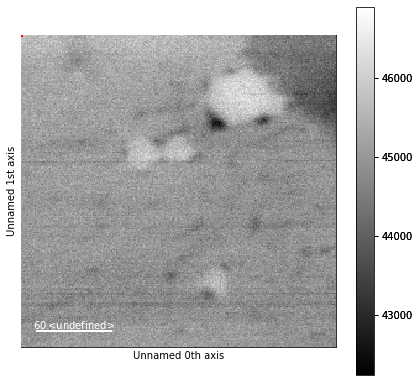

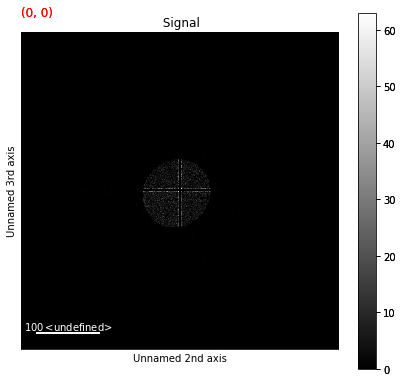

In [9]:
#show area to be cropped
d_sub.plot()
roi_dat = sq_roi.interactive(d_sub)
print(sq_roi)

[########################################] | 100% Completed |  2.5s


2020-06-17 10:28:24,258:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:560:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f8554248d68>
2020-06-17 10:28:24,259:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:608:Using auto colorbar locator on colorbar
2020-06-17 10:28:24,260:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:609:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f8554248d68>
2020-06-17 10:28:24,261:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:780:Setting pcolormesh
2020-06-17 10:28:24,489:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/colorbar.py:560:locator: <matplotlib.colorbar._ColorbarAutoLocator object at 0x7f8554164518>
2020-06-17 10:28:24,490:/dls_sw/apps/python/a

(32, 32, 515, 515)


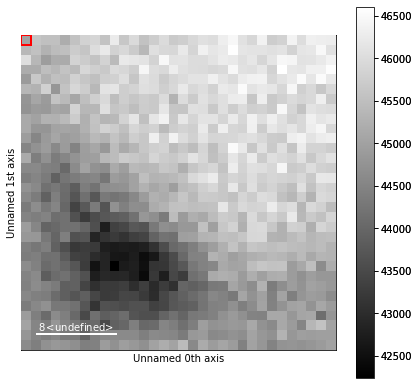

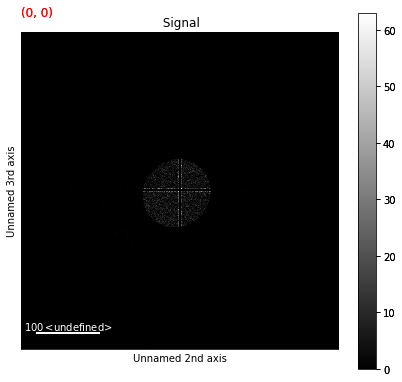

In [10]:
d_crop = sq_roi(d)
d_crop.compute()
d_crop.plot()
print(d_crop.data.shape)

### Create 2D image of 4D data

In [24]:
data = np.array(d_crop.data, dtype=np.float64)
data_tile = ptyrex.core.toolbox.cut2(data, [128,128])
data_bin = np.copy(data_tile)
data_bin = ptyrex.core.toolbox.bin(data_bin, 128)
data_tile = ptyrex.core.toolbox.bin(data_tile, 8)
data_tile = np.abs(ptyrex.core.toolbox.tile(data_tile))
print(data_tile.shape)

(512, 512)


In [27]:
import matplotlib.pyplot as plt
%matplotlib qt5
plt.figure()
plt.subplot(1,2,1)
plt.imshow(np.squeeze(data_bin))
plt.subplot(1,2,2)
plt.imshow(data_tile)
plt.gray()
plt.show()

2020-06-17 10:57:00,418:/dls_sw/apps/python/anaconda/4.6.14/64/envs/python3.7/lib/python3.7/site-packages/matplotlib/pyplot.py:225:Loaded backend Qt5Agg version unknown.
